### The following analysis is done by Sra using a small dataset obtained from https://github.com/manutej. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url = "https://raw.githubusercontent.com/manutej/course_datasets/main/heart.csv"
df = pd.read_csv(url)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### We are choosing the "HeartDisease" as the predictor variable as we are interested to know if we can predict if a patient has heart disease or not based on their gender, resting BP, cholesterol, fasting glucose, etc. This will be a classification model and thus for initial analysis, we will model it using Logistic Regression, Random Forest, Decision Tree, SVM and KNN. Models will then be evaluated and the best model will be chosen. 

In [7]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### The classes -- 0 and 1 -- are not balanced. We need to consider this as we build our models. 

<AxesSubplot:>

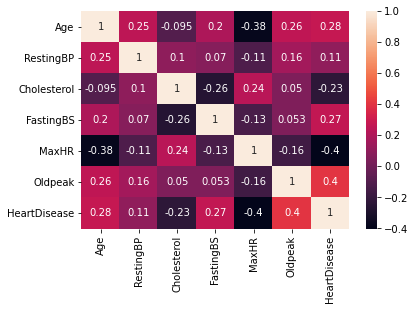

In [8]:
sns.heatmap(df.corr(), annot=True)

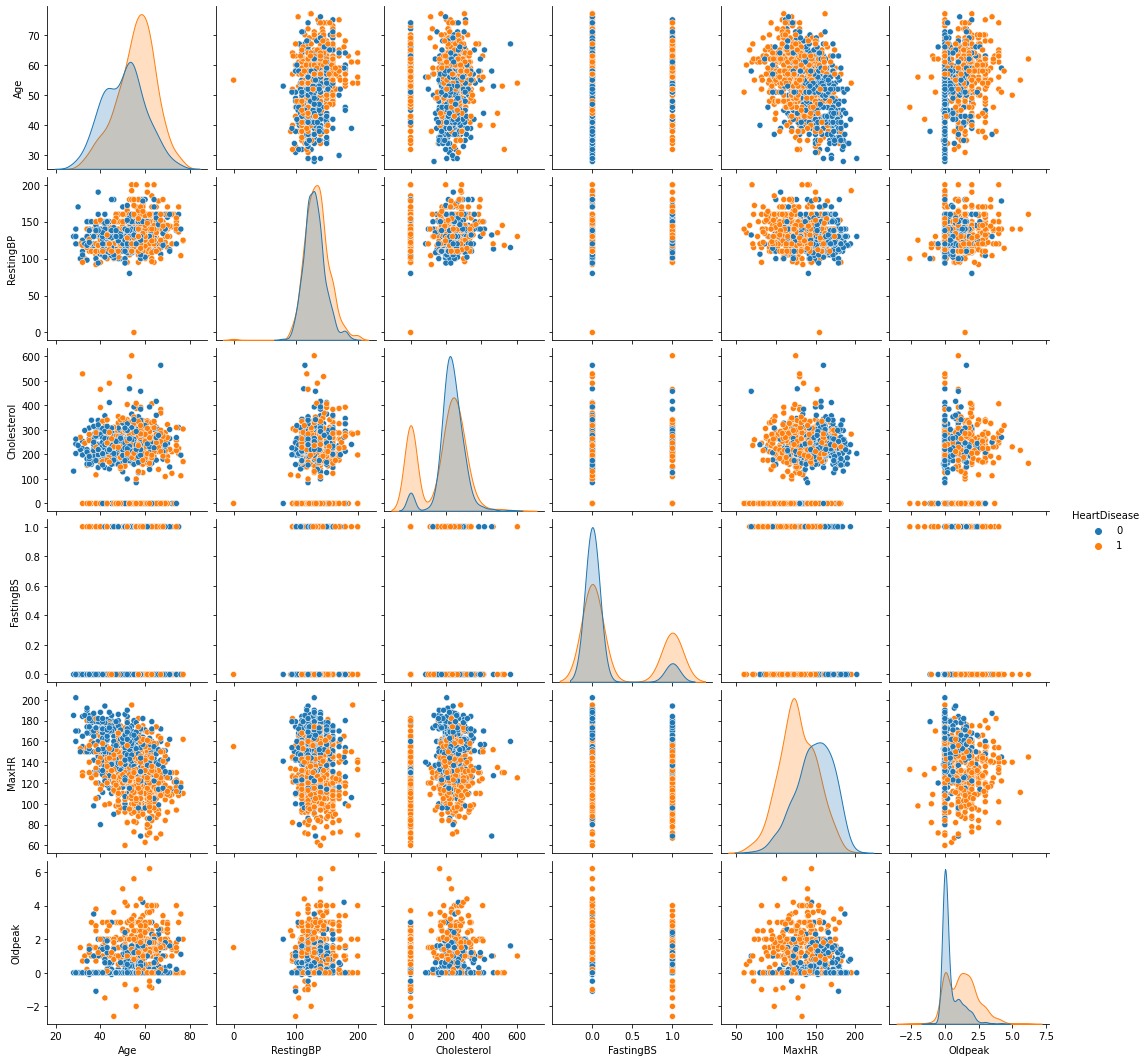

In [10]:
sns.pairplot(df, hue='HeartDisease')

In [3]:
# Data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Use dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and fit the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fitted_transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [12]:
# Modeling using Logistic Regression, LogisticRegressionCV, SVM, KNN, Decision Tree and Random Forest 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logistic_model = LogisticRegression()
logistic_model.fit(fitted_transformed_X_train, y_train)

logisticCV_model = LogisticRegressionCV(cv=11, random_state=42)
logisticCV_model.fit(fitted_transformed_X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(fitted_transformed_X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(fitted_transformed_X_train, y_train)

from sklearn.svm import SVC
svm_model = SVC(class_weight='balanced')
svm_model.fit(fitted_transformed_X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(fitted_transformed_X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [13]:
# Make Predictions

y_logistic_model_predicted = logistic_model.predict(transformed_X_test)
y_logisticCV_model_predicted = logisticCV_model.predict(transformed_X_test)
y_decision_tree_model_predicted = decision_tree_model.predict(transformed_X_test)
y_random_forest_model_predicted = random_forest_model.predict(transformed_X_test)
y_svm_model_predicted = svm_model.predict(transformed_X_test)
y_knn_model_predicted = knn_model.predict(transformed_X_test)

In [14]:
# Evaluate the models

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report

print(classification_report(y_logistic_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        84
           1       0.84      0.90      0.87       100

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [15]:
print(classification_report(y_logisticCV_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        87
           1       0.82      0.91      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



In [16]:
print(classification_report(y_decision_tree_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        76
           1       0.88      0.87      0.87       108

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [17]:
print(classification_report(y_random_forest_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.88      0.90      0.89       105

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [18]:
print(classification_report(y_svm_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.88      0.91      0.90       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [19]:
print(classification_report(y_knn_model_predicted, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.88      0.91      0.90       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



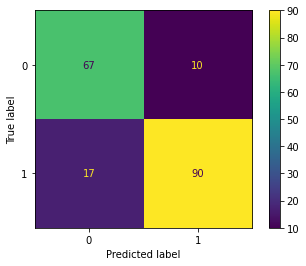

In [20]:
plot_confusion_matrix(logistic_model, transformed_X_test, y_test)

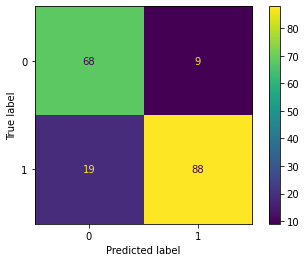

In [21]:
plot_confusion_matrix(logisticCV_model, transformed_X_test, y_test)

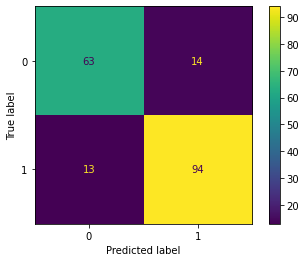

In [22]:
plot_confusion_matrix(decision_tree_model, transformed_X_test, y_test)

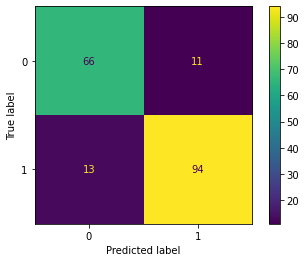

In [23]:
plot_confusion_matrix(random_forest_model, transformed_X_test, y_test)

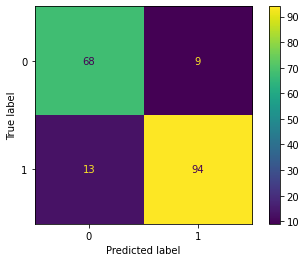

In [24]:
plot_confusion_matrix(svm_model, transformed_X_test, y_test)

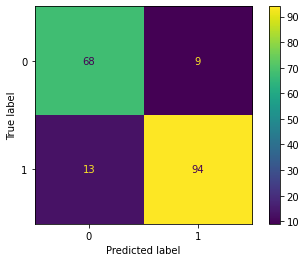

In [25]:
plot_confusion_matrix(knn_model, transformed_X_test, y_test)

### Based on the above accuracy_scores, we are getting better accuracies -- 88% -- using knn and svm. Random forest also gives a closer accuracy value of 87%. This is also confirmed by the confusion matrices -- knn, svm, random forest -- have lower FP and FN compared to the other models. Thus, we can focus on these three models for further analysis. 

In [30]:
# Further analysis using cross-validation

from sklearn.model_selection import GridSearchCV

In [33]:
# Support Vector Machine -- Further Analysis

param_grid_svm = {'C':[10, 1, 0.1, 0.01], 'kernel':['rbf','linear','sigmoid','poly'], 'gamma':['scale','auto']}
grid_svm = GridSearchCV(svm_model, param_grid_svm)
grid_svm.fit(fitted_transformed_X_train, y_train)
grid_svm.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [34]:
# So, let's use the best parameters to recreate the SVM model
svm_model_best = SVC(C=1, gamma='auto', kernel='rbf', class_weight='balanced')
svm_model_best.fit(fitted_transformed_X_train, y_train)
y_svm_model_best_predicted = svm_model_best.predict(transformed_X_test)
accuracy_score(y_svm_model_best_predicted, y_test)

0.8804347826086957

### Conclusion -- there were not any further improvements even after using cross-validation and best parameters

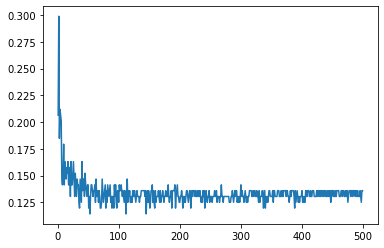

In [36]:
# Random Forest further analysis

# Let's first choose the correct number of trees
error = []
for k in range(1,500):
    model = RandomForestClassifier(n_estimators=k,  max_features='auto')
    model.fit(fitted_transformed_X_train, y_train)
    predictions = model.predict(transformed_X_test)
    error.append(1 - accuracy_score(predictions, y_test))
    
plt.figure(figsize=(10,10),dpi=200)
plt.plot(range(1,500),error)

### The plot shows that the default value of n_estimators = 100 is enough number of trees to find a model

In [39]:
# cross-validation

param_grid_rf = {'criterion':['gini','entropy', 'log_loss'], 'max_features':['sqrt', 'log2'], 'bootstrap':[True,False],'oob_score':[True,False]}
grid_rf = GridSearchCV(random_forest_model, param_grid_rf)
grid_rf.fit(fitted_transformed_X_train, y_train)
grid_rf.best_params_

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda

C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sraba\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'log2',
 'oob_score': False}

In [40]:
# Recreate the model using the best parameters

rf_model_best = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features='log2', oob_score=False)
rf_model_best.fit(fitted_transformed_X_train, y_train)
y_rf_model_best_predicted = rf_model_best.predict(transformed_X_test)
accuracy_score(y_rf_model_best_predicted, y_test)

0.875

### Conclusion -- a slight improvement from 87% to 87.5 or approximately 88%

In [42]:
# KNN further analysis

k_values = list(range(1,100))
param_grid_knn = {'n_neighbors': k_values, 'algorithm':['auto','kd_tree','ball_tree','brute']}
grid_knn = GridSearchCV(knn_model, param_grid_knn)
grid_knn.fit(fitted_transformed_X_train, y_train)
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 19}

In [43]:
# Recreate the model using the best parameters

knn_model_best = KNeighborsClassifier(n_neighbors=19, algorithm='auto')
knn_model_best.fit(fitted_transformed_X_train, y_train)
y_knn_model_best_predicted = knn_model_best.predict(transformed_X_test)
accuracy_score(y_knn_model_best_predicted, y_test)

0.8858695652173914

### Conclusion -- a slight improvement, from 88% to about 88.6 or approximately 89%